In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read raw data

In [37]:
s1 = pd.read_pickle("S1.pkl")
s1

{'rpeaks': array([    240,    1174,    2128, ..., 6447292, 6447748, 6448224]),
 'signal': {'chest': {'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
          [ 0.8556    , -0.06900001, -0.3646    ],
          [ 0.852     , -0.07020003, -0.3642    ],
          ...,
          [ 0.88759995, -0.1038    , -0.27920002],
          [ 0.88619995, -0.10159999, -0.27819997],
          [ 0.88680005, -0.10140002, -0.27380002]]),
   'ECG': array([[0.01560974],
          [0.01812744],
          [0.01753235],
          ...,
          [0.21368408],
          [0.21556091],
          [0.21702576]]),
   'EMG': array([[-1.5],
          [-1.5],
          [-1.5],
          ...,
          [-1.5],
          [-1.5],
          [-1.5]]),
   'EDA': array([[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]),
   'Temp': array([[-273.15],
          [-273.15],
          [-273.15],
          ...,
          [-273.15],
          [-273.15],
          [-273.15]], dt

## Understanding structure of raw data

In [38]:
s1.keys()

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

In [39]:
pd.DataFrame(s1['signal'])

,chest,wrist
ACC,"[[0.8564000129699707, -0.06779998540878296, -0...","[[-0.765625, -0.078125, 0.671875], [-0.765625,..."
BVP,NaN,"[[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]..."
ECG,"[[0.015609741210937498], [0.01812744140625], [...",NaN
EDA,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[4.722437], [4.728843], [4.718594], [4.717312..."
EMG,"[[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...",NaN
Resp,"[[4.44183349609375], [4.45098876953125], [4.47...",NaN
TEMP,NaN,"[[32.13], [32.16], [32.16], [32.16], [32.16], ..."
Temp,"[[-273.15], [-273.15], [-273.15], [-273.15], [...",NaN


## Measure length of each variable

In [40]:
y = s1['activity']
len(y)

36848

In [41]:
signal = s1['signal']
chest = signal['chest']
wrist = signal['wrist']

In [42]:
for i in chest.values():
    print(len(i))

6448400
6448400
6448400
6448400
6448400
6448400


In [43]:
for i in wrist.values():
    print(len(i))

294784
589568
36848
36848


## Method of treating 3D-ACC variable (Chest)

In [44]:
c_ACC = chest['ACC']
c_ACC

array([[ 0.85640001, -0.06779999, -0.36559999],
       [ 0.8556    , -0.06900001, -0.3646    ],
       [ 0.852     , -0.07020003, -0.3642    ],
       ...,
       [ 0.88759995, -0.1038    , -0.27920002],
       [ 0.88619995, -0.10159999, -0.27819997],
       [ 0.88680005, -0.10140002, -0.27380002]])

In [49]:
c_ACC_1 = []
c_ACC_2 = []
c_ACC_3 = []
for i in c_ACC:
    c_ACC_1.append(i[0])
    c_ACC_2.append(i[1])
    c_ACC_3.append(i[2])

In [50]:
print(c_ACC_1[:5])
print(c_ACC_2[:5])
print(c_ACC_3[:5])

[0.8564000129699707, 0.8555999994277954, 0.8519999980926514, 0.8525999784469604, 0.8525999784469604]
[-0.06779998540878296, -0.0690000057220459, -0.07020002603530884, -0.0690000057220459, -0.06980001926422119]
[-0.36559998989105225, -0.3646000027656555, -0.36419999599456787, -0.36400002241134644, -0.3654000163078308]


## Compress variables into 4Hz (chest)

In [51]:
from more_itertools import chunked
c_ACC1_4hz = [sum(x) / len(x) for x in chunked(c_ACC_1, 175)]
c_ACC2_4hz = [sum(x) / len(x) for x in chunked(c_ACC_2, 175)]
c_ACC3_4hz = [sum(x) / len(x) for x in chunked(c_ACC_3, 175)]
c_ECG_4hz = [sum(x) / len(x) for x in chunked(chest['ECG'], 175)]
c_EDA_4hz = [sum(x) / len(x) for x in chunked(chest['EDA'], 175)]
c_EMG_4hz = [sum(x) / len(x) for x in chunked(chest['EMG'], 175)]
c_Resp_4hz = [sum(x) / len(x) for x in chunked(chest['Resp'], 175)]
c_Temp_4hz = [sum(x) / len(x) for x in chunked(chest['Temp'], 175)]

## Method of treating 3D-ACC variable (wrist)

In [52]:
w_ACC = wrist['ACC']
w_ACC

array([[-0.765625, -0.078125,  0.671875],
       [-0.765625, -0.078125,  0.65625 ],
       [-0.765625, -0.078125,  0.671875],
       ...,
       [-0.375   , -0.015625,  0.9375  ],
       [-0.390625,  0.      ,  0.9375  ],
       [-0.375   ,  0.      ,  0.9375  ]])

In [53]:
w_ACC_1 = []
w_ACC_2 = []
w_ACC_3 = []
for i in w_ACC:
    w_ACC_1.append(i[0])
    w_ACC_2.append(i[1])
    w_ACC_3.append(i[2])

## Compress variables in to 4Hz (wrist)

In [54]:
w_ACC1_4hz = [sum(x) / len(x) for x in chunked(w_ACC_1, 8)]
w_ACC2_4hz = [sum(x) / len(x) for x in chunked(w_ACC_2, 8)]
w_ACC3_4hz = [sum(x) / len(x) for x in chunked(w_ACC_3, 8)]
w_BVP_4hz = [sum(x) / len(x) for x in chunked(wrist['BVP'], 16)]

## Process generated variables into data frame

In [55]:
y = np.hstack(y).tolist()
c_ecg = np.hstack(c_ECG_4hz).tolist()
c_eda = np.hstack(c_EDA_4hz).tolist()
c_emg = np.hstack(c_EMG_4hz).tolist()
c_temp = np.hstack(c_Temp_4hz).tolist()
c_resp = np.hstack(c_Resp_4hz).tolist()
w_bvp = np.hstack(w_BVP_4hz).tolist()
w_eda = np.hstack(wrist['EDA']).tolist()
w_temp = np.hstack(wrist['TEMP']).tolist()

In [56]:
dict4hz = {'y' : y, 'c_acc1' : c_ACC1_4hz, 'c_acc2' : c_ACC2_4hz, 'c_acc3' : c_ACC3_4hz, 'c_ecg':c_ecg, 'c_eda':c_eda, 'c_emg':c_emg,
           'c_temp':c_temp, 'c_resp':c_resp, 'w_acc1':w_ACC1_4hz, 'w_acc2': w_ACC2_4hz, 'w_acc3': w_ACC3_4hz, 'w_bvp':w_bvp, 'w_eda':w_eda,
           'w_temp': w_temp}

In [57]:
df = pd.DataFrame(dict4hz)
df.head(10)

,y,c_acc1,c_acc2,c_acc3,c_ecg,c_eda,c_emg,c_temp,c_resp,w_acc1,w_acc2,w_acc3,w_bvp,w_eda,w_temp
0,0.0,0.852157,-0.066488,-0.367784,0.035650,0.0,-1.5,-273.149689,4.834438,-0.763672,-0.076172,0.669922,0.138125,4.722437,32.13
1,0.0,0.851262,-0.066655,-0.370442,0.103145,0.0,-1.5,-273.149689,4.238839,-0.763672,-0.078125,0.671875,-26.262500,4.728843,32.16
2,0.0,0.851570,-0.064677,-0.370251,0.099101,0.0,-1.5,-273.149689,2.058559,-0.761719,-0.078125,0.671875,-40.959375,4.718594,32.16
3,0.0,0.852142,-0.065486,-0.371278,-0.170757,0.0,-1.5,-273.149689,-0.463981,-0.753906,-0.078125,0.671875,24.173125,4.717312,32.16
4,0.0,0.851958,-0.065894,-0.370466,-0.036633,0.0,-1.5,-273.149689,-1.867397,-0.761719,-0.076172,0.671875,25.781250,4.713469,32.16
5,0.0,0.853454,-0.066655,-0.367393,0.027540,0.0,-1.5,-273.149689,-1.400373,-0.763672,-0.078125,0.671875,8.678125,4.712188,32.15
6,0.0,0.848446,-0.068993,-0.377715,0.119724,0.0,-1.5,-273.149689,0.611511,-0.755859,-0.076172,0.673828,-17.215625,4.716032,32.15
7,0.0,0.848849,-0.063319,-0.363015,0.134410,0.0,-1.5,-273.149689,2.554940,-0.765625,-0.070312,0.671875,-35.286875,4.704501,32.15
8,0.0,0.847730,-0.070083,-0.379448,-0.212572,0.0,-1.5,-273.149689,2.310625,-0.751953,-0.078125,0.671875,21.870000,4.698095,32.15
9,0.0,0.848426,-0.065433,-0.378317,-0.074286,0.0,-1.5,-273.149689,0.124163,-0.755859,-0.078125,0.671875,28.181250,4.700657,32.15


## Data Visualization

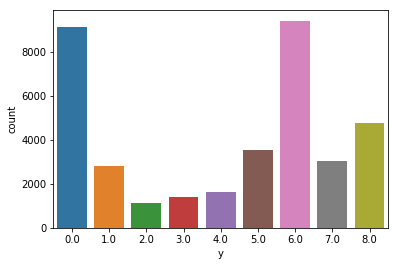

In [58]:
sns.countplot(x='y', data = df)

E:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


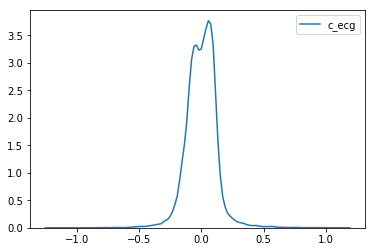

In [59]:
sns.kdeplot(df['c_ecg'])

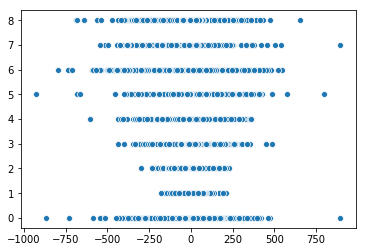

In [60]:
sns.scatterplot(x=w_bvp, y=y, data =df)

E:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


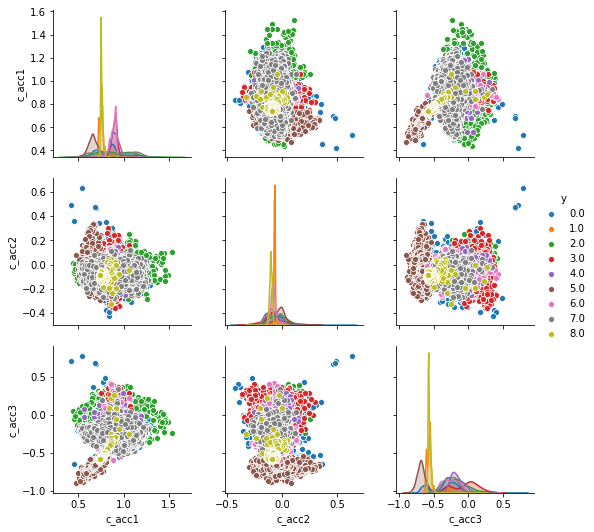

In [61]:
sns.pairplot(df, vars=['c_acc1', 'c_acc2', 'c_acc3'], hue="y") # relationship between 3D-ACC data

E:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


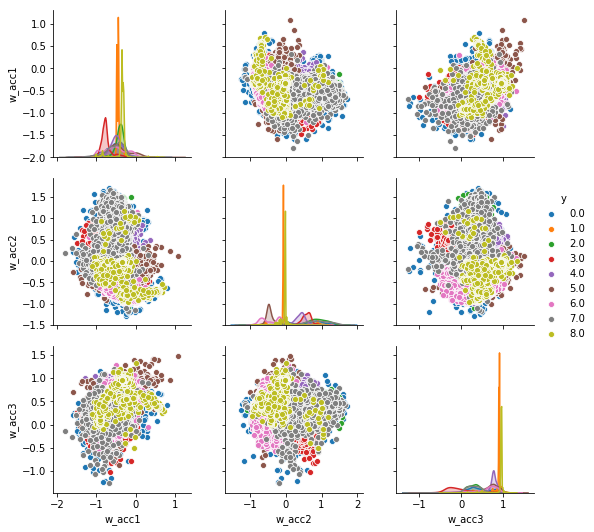

In [62]:
sns.pairplot(df, vars=['w_acc1', 'w_acc2', 'w_acc3'], hue="y") # relationship between 3D-ACC data

E:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


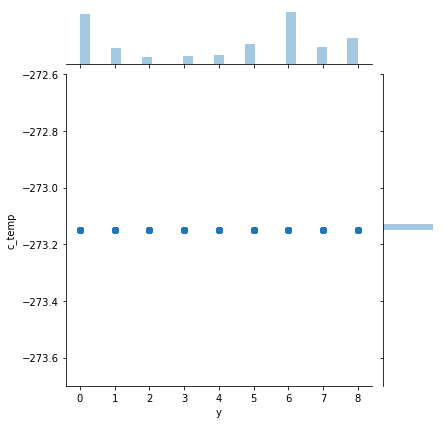

In [63]:
sns.jointplot(x= 'y', y = 'c_temp', data = df)

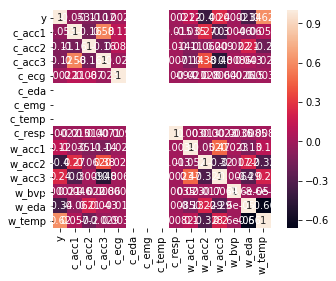

In [64]:
sns.heatmap(df.corr(), square=True, annot=True)

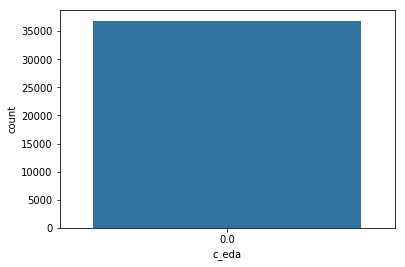

In [65]:
sns.countplot(df['c_eda'])

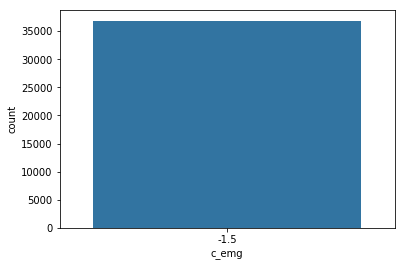

In [66]:
sns.countplot(df['c_emg'])

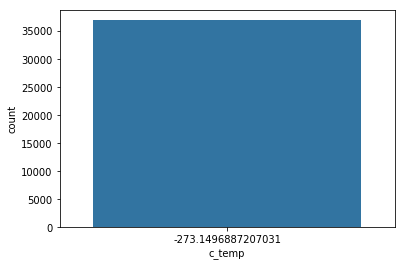

In [67]:
sns.countplot(df['c_temp'])

## Feature selection

In [68]:
df = df.drop(['c_temp','c_eda','c_emg'],axis=1)

## Data split

In [69]:
X = df.iloc[:,1:]

In [70]:
from sklearn.model_selection import train_test_split
y = df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X, y )

## Define a function to get accuracy of model based on test set

In [71]:
def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

## Random forest algorithm

In [92]:
from sklearn.ensemble import RandomForestClassifier
hyperparametres = {"n_estimators" : 100, 
                  "max_features"  :  10,
                  "max_depth"     :  50,}
algorithme = RandomForestClassifier(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.9868649587494572

## Grid Search and hyperparameters selection of random forest

In [84]:
from sklearn.model_selection import GridSearchCV

algorithm = RandomForestClassifier()
hyperparameters = {
    "n_estimators" : [30, 50, 100],
    "max_depth"    : [5, 10,20],
    "max_features" : [5, 8, 10]
}

grid_optimization = GridSearchCV(algorithm, 
                                     hyperparameters, 
                                     cv=5, 
                                     iid=False, )

scores = grid_optimization.fit(X_train, Y_train)

scores.best_score_ , scores.best_estimator_

(0.9881679354619392,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=20, max_features=5, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))

In [88]:
scores.grid_scores_

E:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91138, std: 0.00323, params: {'max_depth': 5, 'max_features': 5, 'n_estimators': 30},
 mean: 0.91063, std: 0.00469, params: {'max_depth': 5, 'max_features': 5, 'n_estimators': 50},
 mean: 0.91388, std: 0.00287, params: {'max_depth': 5, 'max_features': 5, 'n_estimators': 100},
 mean: 0.88414, std: 0.00150, params: {'max_depth': 5, 'max_features': 8, 'n_estimators': 30},
 mean: 0.88363, std: 0.00231, params: {'max_depth': 5, 'max_features': 8, 'n_estimators': 50},
 mean: 0.88374, std: 0.00101, params: {'max_depth': 5, 'max_features': 8, 'n_estimators': 100},
 mean: 0.86717, std: 0.00306, params: {'max_depth': 5, 'max_features': 10, 'n_estimators': 30},
 mean: 0.87122, std: 0.00506, params: {'max_depth': 5, 'max_features': 10, 'n_estimators': 50},
 mean: 0.86970, std: 0.00265, params: {'max_depth': 5, 'max_features': 10, 'n_estimators': 100},
 mean: 0.97948, std: 0.00192, params: {'max_depth': 10, 'max_features': 5, 'n_estimators': 30},
 mean: 0.97956, std: 0.00239, params: {'max

## Grid search and hyperparameter selection of Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
algorithm2 = DecisionTreeClassifier()
hyperparameters = {
    "max_depth"    : [5, 10,20],
    "max_features" : [5, 8, 10]
}

grid_optimization = GridSearchCV(algorithm2, 
                                     hyperparameters, 
                                     cv=5, 
                                     iid=False, )

scores = grid_optimization.fit(X_train, Y_train)

scores.best_score_ , scores.best_estimator_

(0.9769503978423033,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
             max_features=10, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'))

In [48]:
scores.grid_scores_

E:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85736, std: 0.03432, params: {'max_depth': 5, 'max_features': 5},
 mean: 0.85443, std: 0.01686, params: {'max_depth': 5, 'max_features': 8},
 mean: 0.86351, std: 0.00625, params: {'max_depth': 5, 'max_features': 10},
 mean: 0.95433, std: 0.00732, params: {'max_depth': 10, 'max_features': 5},
 mean: 0.97000, std: 0.00406, params: {'max_depth': 10, 'max_features': 8},
 mean: 0.96349, std: 0.00348, params: {'max_depth': 10, 'max_features': 10},
 mean: 0.97051, std: 0.00165, params: {'max_depth': 20, 'max_features': 5},
 mean: 0.97568, std: 0.00177, params: {'max_depth': 20, 'max_features': 8},
 mean: 0.97811, std: 0.00167, params: {'max_depth': 20, 'max_features': 10}]

## Logistic regression (multi-nominal)

In [49]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression(random_state=0).fit(X_train, Y_train)
lrmodel.score(X_test, Y_test)

0.825119409465914

## Visualization of grid search of Decision tree

In [43]:
dtforplot = scores.grid_scores_

E:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [44]:
dft = pd.DataFrame(dtforplot)
dft

,parameters,mean_validation_score,cv_validation_scores
0,"{'max_depth': 5, 'max_features': 5}",0.857365,"[0.7934900542495479, 0.8844484629294755, 0.887..."
1,"{'max_depth': 5, 'max_features': 8}",0.854432,"[0.8390596745027125, 0.8636528028933093, 0.848..."
2,"{'max_depth': 5, 'max_features': 10}",0.863510,"[0.8636528028933093, 0.8656419529837251, 0.872..."
3,"{'max_depth': 10, 'max_features': 5}",0.954333,"[0.9495479204339964, 0.9683544303797469, 0.951..."
4,"{'max_depth': 10, 'max_features': 8}",0.970003,"[0.9654611211573237, 0.9755877034358047, 0.965..."
5,"{'max_depth': 10, 'max_features': 10}",0.963491,"[0.9613019891500905, 0.9607594936708861, 0.962..."
6,"{'max_depth': 20, 'max_features': 5}",0.970509,"[0.9710669077757685, 0.9730560578661844, 0.968..."
7,"{'max_depth': 20, 'max_features': 8}",0.975684,"[0.972875226039783, 0.9775768535262206, 0.9775..."
8,"{'max_depth': 20, 'max_features': 10}",0.978109,"[0.9748643761301989, 0.978119349005425, 0.9791..."


E:\anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


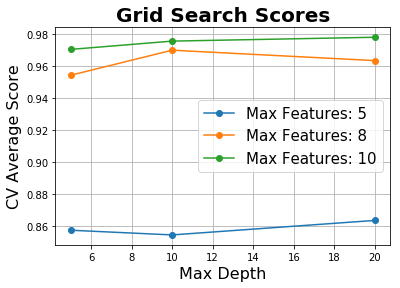

In [45]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
max_depth = [5, 10,20]
max_features = [5, 8, 10]
plot_grid_search(scores.cv_results_, max_depth, max_features, 'Max Depth', 'Max Features')